In [ ]:
try:
    import google.colab
    !mkdir -p repository && cd repository && \
     git clone https://github.com/safety-research/circuit-tracer && \
     curl -LsSf https://astral.sh/uv/install.sh | sh && \
     uv pip install -e circuit-tracer/

    import sys
    from huggingface_hub import notebook_login
    sys.path.append('repository/circuit-tracer')
    sys.path.append('repository/circuit-tracer/demos')
    notebook_login(new_session=False)
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

Cloning into 'circuit-tracer'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 128 (delta 7), reused 3 (delta 3), pack-reused 94 (from 1)
Receiving objects: 100% (128/128), 2.13 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (22/22), done.
downloading uv 0.7.12 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!
Using Python 3.11.13 environment at: /usr
Resolved 91 packages in 3.33s
   Building circuit-tracer @ file:///content/repository/circuit-tracer
   Building circuit-tracer @ file:///content/repository/circuit-tracer
   Building circuit-tracer @ file:///content/repository/circuit-tracer
   Building transformers-stream-generator==0.0.5
   Building circuit-tracer @ file:///content/repository/circuit-tracer
   Building transformers-stream-generator==0.0.5
⠙ Preparing packages... (0/18)
   Building circuit-tracer @ file:///

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from collections import namedtuple
from typing import List, Dict

import torch

from circuit_tracer import ReplacementModel
from utils import extract_supernode_features

model = ReplacementModel.from_pretrained("google/gemma-2-2b", 'gemma', dtype=torch.bfloat16)

Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/481M [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Loaded pretrained model google/gemma-2-2b into HookedTransformer


In [ ]:
yuan_url="https://www.neuronpedia.org/gemma-2-2b/graph?slug=yuan&pruningThreshold=0.6&densityThreshold=1&pinnedIds=27_33395_8%2CE_6037_2%2CE_3170_5%2CE_47015_7%2C21_5943_8%2C15_4494_2%2C2_7173_2%2C3_13984_2%2C6_4662_2%2C2_13756_5%2C3_14009_5%2C1_2344_5%2C4_6087_5%2C1_1214_7%2C8_3601_7%2C4_4153_7%2C2_11100_7%2C14_12274_7%2C19_10851_7%2C18_15524_7%2C9_4566_7%2C5_11336_7%2C7_691_8%2C9_3441_8%2C16_4298_8%2C17_1084_8%2C25_3264_8%2C20_16280_8%2C8_2781_7&clerps=%5B%5B%2221_2105943_8%22%2C%22cities+%28say+Beijing%29%22%5D%5D&supernodes=%5B%5B%22capital%22%2C%222_7173_2%22%2C%2215_4494_2%22%2C%226_4662_2%22%2C%223_13984_2%22%5D%2C%5B%22country%22%2C%224_6087_5%22%2C%222_13756_5%22%2C%223_14009_5%22%2C%221_2344_5%22%5D%2C%5B%22currency%22%2C%228_3601_7%22%2C%224_4153_7%22%2C%221_1214_7%22%2C%228_2781_7%22%2C%222_11100_7%22%5D%2C%5B%22China%22%2C%2214_12274_7%22%2C%2219_10851_7%22%2C%2218_15524_7%22%2C%229_4566_7%22%2C%225_11336_7%22%5D%2C%5B%22say+a+capital%22%2C%2225_3264_8%22%2C%227_691_8%22%2C%2217_1084_8%22%2C%229_3441_8%22%2C%2216_4298_8%22%5D%5D"
supernode_features = extract_supernode_features(yuan_url)

Создадим репрезентацию circuit, который решает промпт

In [ ]:
from graph_visualization import create_graph_visualization, Supernode, InterventionGraph, Feature

# Supernodes that upweight certain outputs
say_beijing_node = Supernode(name='Say Beijing', features=[Feature(layer=21, pos=8, feature_idx=5943)])
say_capital_node = Supernode(name='Say a capital', features=supernode_features['say a capital'], children=[say_beijing_node])

# Intermediate nodes
china_node = Supernode(name='China', features=supernode_features['China'], children=[say_beijing_node])
country_node = Supernode(name='Country', features=supernode_features['country'], children=[say_capital_node, china_node])
capital_node = Supernode(name='Capital', features=supernode_features['capital'], children=[say_capital_node])
currency_node = Supernode(name='Currency', features=supernode_features['currency'], children=[china_node])

# Embedding nodes
yuan_emb_node = Supernode(name='Emb: Yuan', features=None, children=[china_node, currency_node])
country_emb_node = Supernode(name='Emb: Country', features=None, children=[country_node])
capital_emb_node = Supernode(name='Emb: Capital', features=None, children=[capital_node])

Инициализируем InterventionGraph, который хранит все суперузлы и следит за их состоянием, а также достанем выходные токены и активации для данного промпта.

In [ ]:
prompt = "The capital of the country using Yuan is"
ordered_nodes = [[capital_emb_node, country_emb_node, yuan_emb_node],
                 [capital_node, country_node, currency_node],
                 [say_capital_node, china_node],
                 [say_beijing_node]]
yuan_graph = InterventionGraph(ordered_nodes=ordered_nodes, prompt=prompt)

logits, yuan_activations = model.get_activations(prompt)

# initialize each node, adding it to the intervention graph and recording its default activation
for node in [capital_node, country_node, currency_node, say_capital_node, china_node, say_beijing_node]:
    yuan_graph.initialize_node(node, yuan_activations)

# set each node's current activation to a percent of its default activation (here 100%)
yuan_graph.set_node_activation_fractions(yuan_activations)

Визуализируем граф вместе с топ 5 выходными токенами.

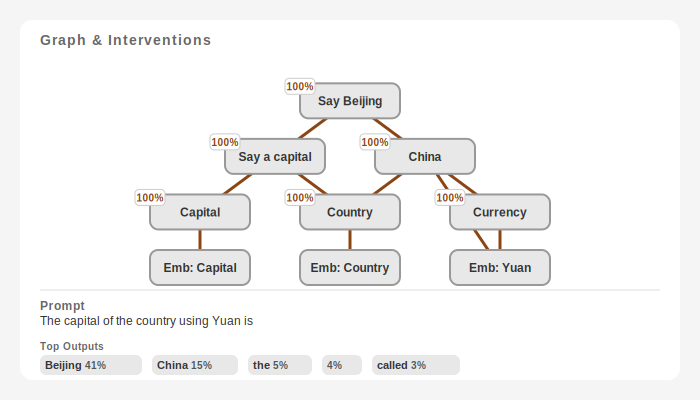

In [ ]:
def get_top_outputs(logits: torch.Tensor, k: int = 5):
    top_probs, top_token_ids = logits.squeeze(0)[-1].softmax(-1).topk(k)
    top_tokens = [model.tokenizer.decode(token_id) for token_id in top_token_ids]
    top_outputs = list(zip(top_tokens, top_probs.tolist()))
    return top_outputs

top_outputs = get_top_outputs(logits)

create_graph_visualization(yuan_graph, top_outputs)

Теперь проверим через интервенции, какую роль играет каждый узел.

In [ ]:
# An Intervention says "set the activation of supernode to intervention_value * its activation in the given activations tensor"
Intervention = namedtuple('Intervention', ['supernode', 'scaling_factor'])
def supernode_intervention(intervention_graph: InterventionGraph, interventions: List[Intervention], replacements: Dict[str, Supernode] = None):
    """Performs interventions on a set of supernodes, records the outputs, and draws the corresponding graph

    Args:
        interventions (List[Intervention]): List of interventions to perform
        replacements (Dict[str, Supernode], optional): Replacement supernodes to add, if we're adding supernodes
            from another prompt. Defaults to None.

    Returns:
        HTML: An IPython.display.HTML object showing the graph corresponding to these interventions
    """
    intervention_values = [(*feature, scaling_factor * default_act) for intervened_supernode, scaling_factor in interventions
                           for feature, default_act in zip(intervened_supernode.features, intervened_supernode.default_activations)]
    new_logits, new_activations = model.feature_intervention(intervention_graph.prompt, intervention_values)
    intervention_graph.set_node_activation_fractions(new_activations)
    top_outputs = get_top_outputs(new_logits)

    for intervened_supernode, scaling_factor in interventions:
        intervened_supernode.activation = None
        intervened_supernode.intervention = f'{scaling_factor}x'

    if replacements is not None:
        for target, replacement in replacements.items():
            intervention_graph.nodes[target].replacement_node = replacement

    return create_graph_visualization(intervention_graph, top_outputs)

Уберём фичу "Say a capital".

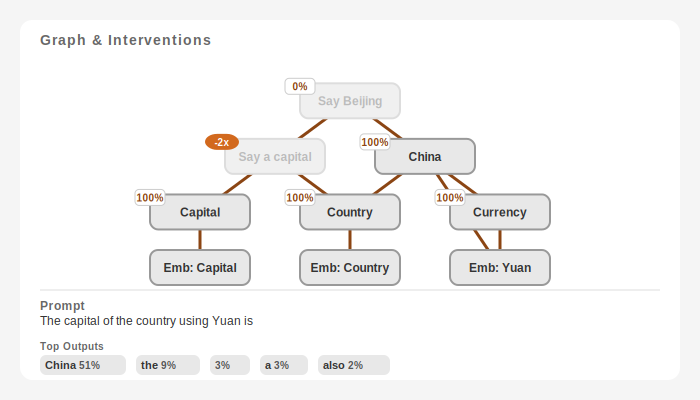

In [ ]:
supernode_intervention(yuan_graph, [Intervention(say_capital_node, -2)])

Узел "Say Beijing" отключился => теперь самый вероятный токен --- "China".

Попробуем убрать "Capital".

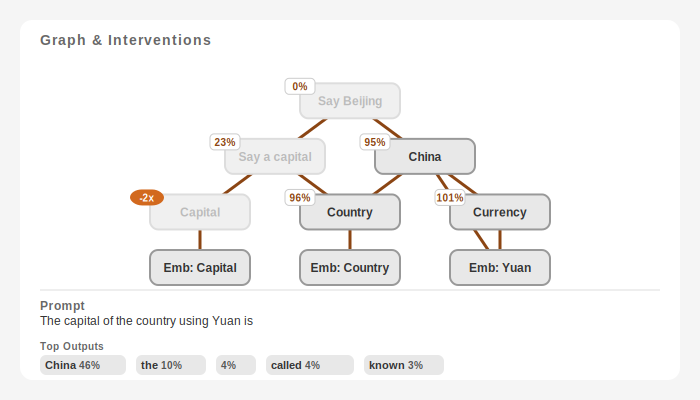

In [ ]:
supernode_intervention(yuan_graph, [Intervention(capital_node, -2)])

Тот же результат, что и с "Say a capital".

Что если убрать "China" или "Currency"?

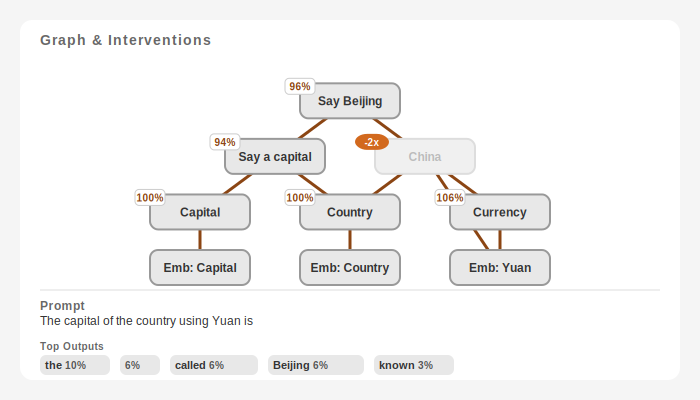

In [ ]:
supernode_intervention(yuan_graph, [Intervention(china_node, -2)])

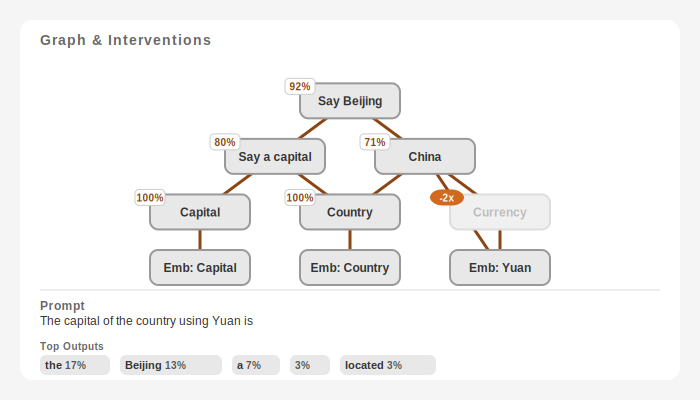

In [ ]:
supernode_intervention(yuan_graph, [Intervention(currency_node, -2)])

Отключение этих узлов приводит к тому, что модель начинает по умолчанию использовать "общие" токены. При этом "China", видимо, играет большую роль для вывода "Beijing".

Наконец, посмотрим, как узел "Country" влияет на выходные токены.

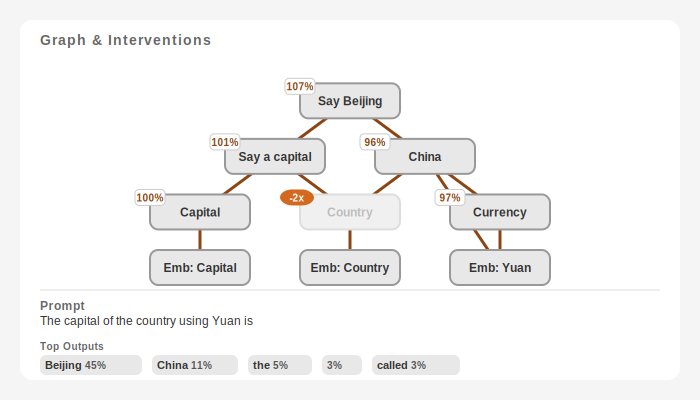

In [ ]:
supernode_intervention(yuan_graph, [Intervention(country_node, -2)])

Вероятность "Beijing" повысилась! Возможно, признаки, связанные с "Country", добавляет шум в рассуждения модели.

Теперь посмотрим, что будет, если заменить узел в оригинальном графе узлом из другого графа, созданного по схожему промпту.

In [ ]:
yen_prompt = "The capital of the country using Yen is"
_, yen_activations = model.get_activations(korean_won_prompt)

yen_url = "https://www.neuronpedia.org/gemma-2-2b/graph?slug=yen&pruningThreshold=0.6&densityThreshold=0.99&pinnedIds=27_22099_8%2CE_6037_2%2CE_3170_5%2CE_79263_7%2C1_3903_7%2C15_10074_7%2C5_15196_7%2C4_12930_7%2C8_3601_7%2C7_12199_7%2C2_13756_5%2C3_14009_5%2C1_2344_5%2C4_6087_5%2C20_1194_7%2C19_9990_7%2C18_9239_7%2C14_10660_7%2C4_4153_7%2C5_8834_7%2C23_850_8%2C22_1860_8%2C15_4494_2%2C2_7173_2%2C3_13984_2%2C6_4662_2%2C16_4298_8%2C17_1084_8%2C9_3441_8%2C21_5943_8&supernodes=%5B%5B%22country%22%2C%221_2344_5%22%2C%223_14009_5%22%2C%224_6087_5%22%2C%222_13756_5%22%5D%2C%5B%22currency%22%2C%227_12199_7%22%2C%228_3601_7%22%2C%2215_10074_7%22%2C%224_12930_7%22%2C%221_3903_7%22%2C%225_15196_7%22%2C%224_4153_7%22%5D%2C%5B%22Japan%22%2C%225_8834_7%22%2C%2219_9990_7%22%2C%2214_10660_7%22%2C%2218_9239_7%22%2C%2220_1194_7%22%5D%2C%5B%22Japan%22%2C%2223_850_8%22%2C%2222_1860_8%22%5D%2C%5B%22capital%22%2C%223_13984_2%22%2C%226_4662_2%22%2C%222_7173_2%22%2C%2215_4494_2%22%5D%2C%5B%22say+a+capital%22%2C%2216_4298_8%22%2C%2217_1084_8%22%2C%229_3441_8%22%5D%5D&clerps=%5B%5B%2222_2209335_8%22%2C%22City+Names+%28say+Tokyo%29%22%5D%5D"
yen_supernodes = extract_supernode_features(yen_url)

say_tokyo_node = Supernode('Say Tokyo', features=[Feature(layer=21, pos=8, feature_idx=5943)])
japan_node = Supernode('Japan', features=yen_supernodes['Japan'] + yen_supernodes['Japan (2)'],
                       children=[say_tokyo_node])

for node in [say_tokyo_node, japan_node]:
    yuan_graph.initialize_node(node, yen_activations)

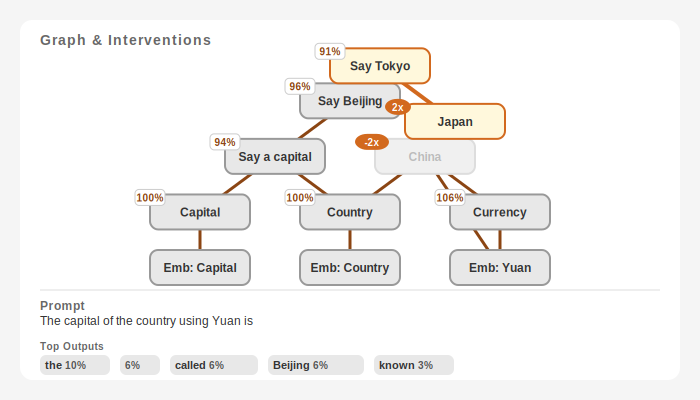

In [ ]:
yen_interventions = [Intervention(china_node, -2), Intervention(japan_node, 2)]
supernode_intervention(yuan_graph, yen_interventions, {china_node.name: japan_node, say_beijing_node.name: say_tokyo_node})

In [ ]:
korean_won_prompt = "The capital of the country using Won is"
_, korean_won_activations = model.get_activations(korean_won_prompt)

korean_won_url = "https://www.neuronpedia.org/gemma-2-2b/graph?slug=korean_won&pruningThreshold=0.6&densityThreshold=0.99&pinnedIds=27_56313_8%2CE_6037_2%2CE_3170_5%2CE_40342_7%2C1_1214_7%2C4_12930_7%2C2_11100_7%2C2_16013_7%2C8_3601_7%2C3_14009_5%2C1_2344_5%2C2_13756_5%2C4_6087_5%2C15_4494_2%2C2_7173_2%2C3_13984_2%2C6_4662_2%2C18_15455_7%2C14_15086_7%2C23_15136_8%2C5_5563_7%2C16_4298_8%2C17_1084_8%2C21_5943_8%2C9_14188_7%2C20_5916_8%2C24_14593_8&supernodes=%5B%5B%22currency%22%2C%228_3601_7%22%2C%224_12930_7%22%2C%221_1214_7%22%2C%222_16013_7%22%2C%222_11100_7%22%5D%2C%5B%22country%22%2C%222_13756_5%22%2C%223_14009_5%22%2C%221_2344_5%22%2C%224_6087_5%22%5D%2C%5B%22capital%22%2C%2215_4494_2%22%2C%226_4662_2%22%2C%222_7173_2%22%2C%223_13984_2%22%5D%2C%5B%22Korea%22%2C%229_14188_7%22%2C%225_5563_7%22%2C%2214_15086_7%22%2C%2218_15455_8%22%2C%2218_15455_7%22%5D%2C%5B%22say+a+capital%22%2C%2220_5916_8%22%2C%2216_4298_8%22%2C%2217_1084_8%22%5D%2C%5B%22Korea%22%2C%2223_3269_8%22%2C%2223_15136_8%22%2C%2224_14593_8%22%5D%5D&clerps=%5B%5B%2224_2409382_8%22%2C%22cities+%28say+Seoul%29%22%5D%2C%5B%2221_2105943_8%22%2C%22cities+%28say+Seoul%29%22%5D%5D"
korean_won_supernodes = extract_supernode_features(korean_won_url)

say_seoul_node = Supernode('Say Seoul', features=[Feature(layer=21, pos=8, feature_idx=5943)])
korea_node = Supernode('Korea', features=korean_won_supernodes['Korea'],
                       children=[say_seoul_node])

for node in [say_seoul_node, korea_node]:
    yuan_graph.initialize_node(node, korean_won_activations)

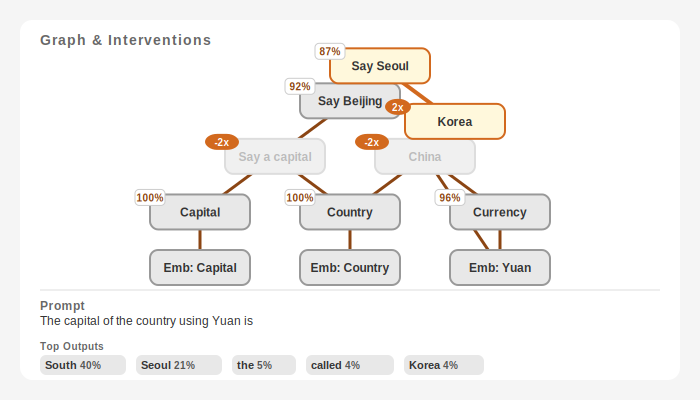

In [ ]:
korean_won_interventions = [Intervention(china_node, -2), Intervention(korea_node, 2)]
supernode_intervention(yuan_graph, korean_won_interventions, {china_node.name: korea_node, say_beijing_node.name: say_seoul_node})